## ML Intro with housing data

In [1]:
import pandas as pd

In [2]:
housing_header = ["HomeID", "HomeAge", "HomeSqft", "LotSize", "BedRooms", 
                  "HighSchoolAPI", "ProxFwy", "CarGarage", "ZipCode", "HomePriceK"]
df = pd.read_csv("fixed-housing-data.csv",names=housing_header)

In [3]:
df.head()

,HomeID,HomeAge,HomeSqft,LotSize,BedRooms,HighSchoolAPI,ProxFwy,CarGarage,ZipCode,HomePriceK
0,1,24,1757,6056,2,899,3,3,94085,894
1,2,10,1563,6085,2,959,4,3,94085,861
2,3,14,1344,6089,2,865,4,3,94085,831
3,4,14,1215,6129,3,959,4,2,94085,809
4,5,24,1866,6141,3,877,4,1,94085,890


In [4]:
# number of rows
len(df)

100

In [5]:
"""
Dataset description
1) HomeID
2) HomeAge = Age of home in years
3) HomeSqft = Square footage of home
4) LotSize = LotSize
5) BedRooms = Num bedrooms as per county data
6) HighSchoolAPI = API for nearest high school
7) ProxFwy = Distance in miles to Freeway
8) CarGarage = Number of cars in garage; 0 = no garage
9) ZipCode = Zipcode of home

Y) HomePriceK = Home price in $K (Target)

9 X Variables; 1 Y variable (Target)

Data Points = 100
"""

'\nDataset description\n1) HomeID\n2) HomeAge = Age of home in years\n3) HomeSqft = Square footage of home\n4) LotSize = LotSize\n5) BedRooms = Num bedrooms as per county data\n6) HighSchoolAPI = API for nearest high school\n7) ProxFwy = Distance in miles to Freeway\n8) CarGarage = Number of cars in garage; 0 = no garage\n9) ZipCode = Zipcode of home\n\nY) HomePriceK = Home price in $K (Target)\n\n9 X Variables; 1 Y variable (Target)\n\nData Points = 100\n'

In [6]:
df.describe()

,HomeID,HomeAge,HomeSqft,LotSize,BedRooms,HighSchoolAPI,ProxFwy,CarGarage,ZipCode,HomePriceK
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,17.200000,1615.280000,7840.500000,2.71000,904.430000,3.100000,1.520000,94559.250000,1080.990000
std,29.011492,4.925711,231.759719,1046.107306,0.71485,36.337713,0.758787,1.234848,475.816351,146.533583
min,1.000000,10.000000,1215.000000,6056.000000,2.00000,850.000000,2.000000,0.000000,94085.000000,809.000000
25%,25.750000,12.750000,1411.500000,7024.250000,2.00000,875.750000,3.000000,0.000000,94086.500000,940.000000
50%,50.500000,17.000000,1606.500000,7822.000000,3.00000,900.500000,3.000000,2.000000,94550.500000,1100.000000
75%,75.250000,21.250000,1836.000000,8839.250000,3.00000,936.000000,4.000000,3.000000,95023.250000,1191.000000
max,100.000000,25.000000,1994.000000,9476.000000,4.00000,975.000000,4.000000,3.000000,95051.000000,1336.000000


In [7]:
X = df.drop(['HomeID','ZipCode','HomePriceK'],axis=1)
# Deleting HomeID, ZipCode, and HomePriceK from X factors

In [8]:
X.head()

,HomeAge,HomeSqft,LotSize,BedRooms,HighSchoolAPI,ProxFwy,CarGarage
0,24,1757,6056,2,899,3,3
1,10,1563,6085,2,959,4,3
2,14,1344,6089,2,865,4,3
3,14,1215,6129,3,959,4,2
4,24,1866,6141,3,877,4,1


In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,df.HomePriceK)
print(lm.intercept_)
print(lm.coef_)
print ("Number of coefficients is ",len(lm.coef_))

67.80356318282998
[ 0.7113247   0.01549376  0.13227138  2.89844    -0.03811933 -9.68650511
 -2.96001004]
Number of coefficients is  7


In [10]:
lm.predict(X)[0:5]

array([846.72143155, 825.61930212, 829.18377144, 834.75116488,
       859.62389878])

Text(0,0.5,'Predicted Prices')

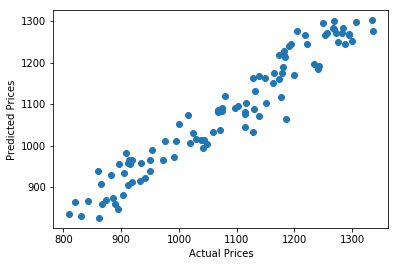

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.HomePriceK,lm.predict(X))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

In [12]:
# MSE is mean square error of the model
import numpy as np
import math
mseFull = math.sqrt(np.mean((df.HomePriceK - lm.predict(X)) ** 2))
print(mseFull)

38.42531394082745


In [13]:
print(X.columns)

Index(['HomeAge', 'HomeSqft', 'LotSize', 'BedRooms', 'HighSchoolAPI',
       'ProxFwy', 'CarGarage'],
      dtype='object')


In [14]:
# How to predict for new data?

In [15]:
row_1 = [14,1617,8394,2,851,2,0]
row_2 = [13,1358,6819,2,851,3,2]
tests = [row_1,row_2]
lm.predict(tests)

array([1167.08581515,  938.42765462])